In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

educationData = pd.read_csv('Data/Processed/Education_Data.csv')
gdpData = pd.read_csv('Data/Processed/GDP_Data.csv')
combinedData = pd.read_csv('Data/Processed/Combined_Data.csv')
continentData = pd.read_csv('Data/Processed/Continent_Data.csv')

<AxesSubplot:>

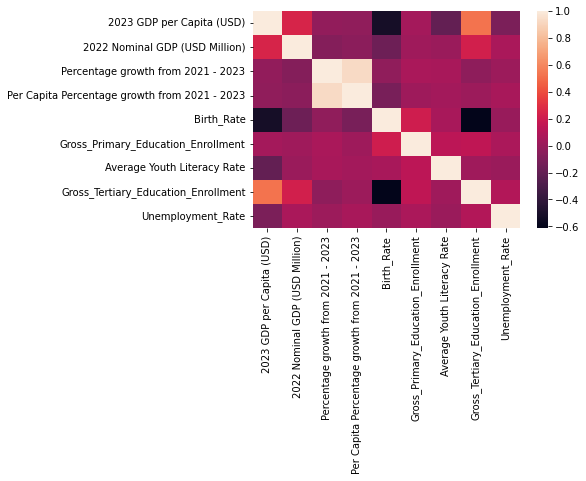

In [2]:
#Check for Correlation 
sb.heatmap(combinedData.corr())

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Americas'),
  Text(1, 0, 'Asia'),
  Text(2, 0, 'Europe'),
  Text(3, 0, 'Africa'),
  Text(4, 0, 'Oceania')])

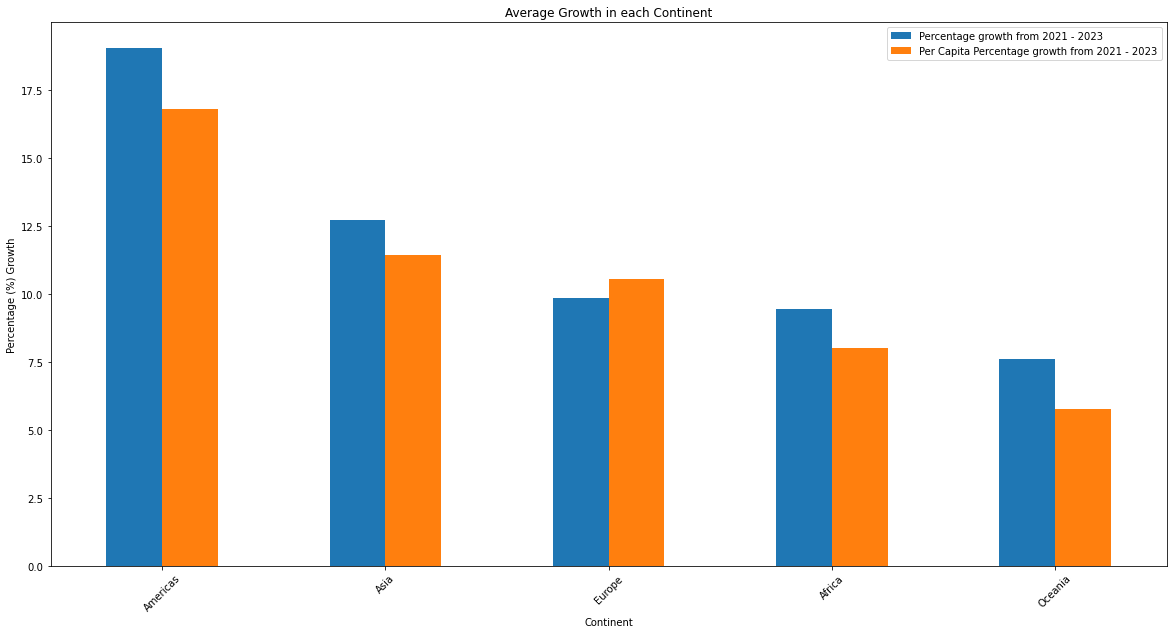

In [3]:
#Overall growth visualization 1
growth1 = continentData[['Continent', 'Percentage growth from 2021 - 2023', 'Per Capita Percentage growth from 2021 - 2023']]
growth1 = growth1.set_index('Continent').sort_values(by=['Per Capita Percentage growth from 2021 - 2023'], ascending = False)
growth1.plot(kind='bar', 
                   figsize = (20, 10), width = 0.5,
                   title = 'Average Growth in each Continent',
                   xlabel = 'Continent',
                   ylabel = 'Percentage (%) Growth')
plt.xticks(rotation=45)

([<matplotlib.patches.Wedge at 0x7fab3f3032e0>,
 [Text(1.0958508919874048, 0.09545062875858477, 'Africa'),
  Text(0.34157323961214975, 1.0456231261696831, 'Americas'),
  Text(-1.038415983361904, -0.3628942621460554, 'Asia'),
  Text(0.690574793509556, -0.8562163596715695, 'Europe'),
  Text(1.0980134658876313, -0.06607895829560258, 'Oceania')],
 [Text(0.597736850174948, 0.05206397932286442, '2.8%'),
  Text(0.18631267615208166, 0.5703398870016453, '34.4%'),
  Text(-0.5664087181974021, -0.1979423248069393, '36.3%'),
  Text(0.3766771600961214, -0.4670271052754015, '24.6%'),
  Text(0.5989164359387079, -0.036043068161237764, '1.9%')])

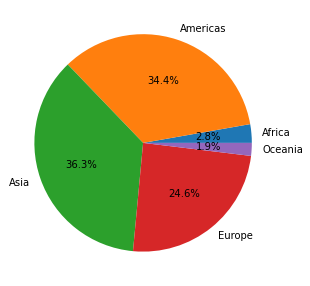

In [4]:
#Distribution of 2023 GDP across continents
labels = 'Africa', 'Americas', 'Asia', 'Europe', 'Oceania'
sizes = [continentData['2023 Nominal GDP (USD Million)'][0],
         continentData['2023 Nominal GDP (USD Million)'][1],
         continentData['2023 Nominal GDP (USD Million)'][2],
         continentData['2023 Nominal GDP (USD Million)'][3],
         continentData['2023 Nominal GDP (USD Million)'][4]]

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

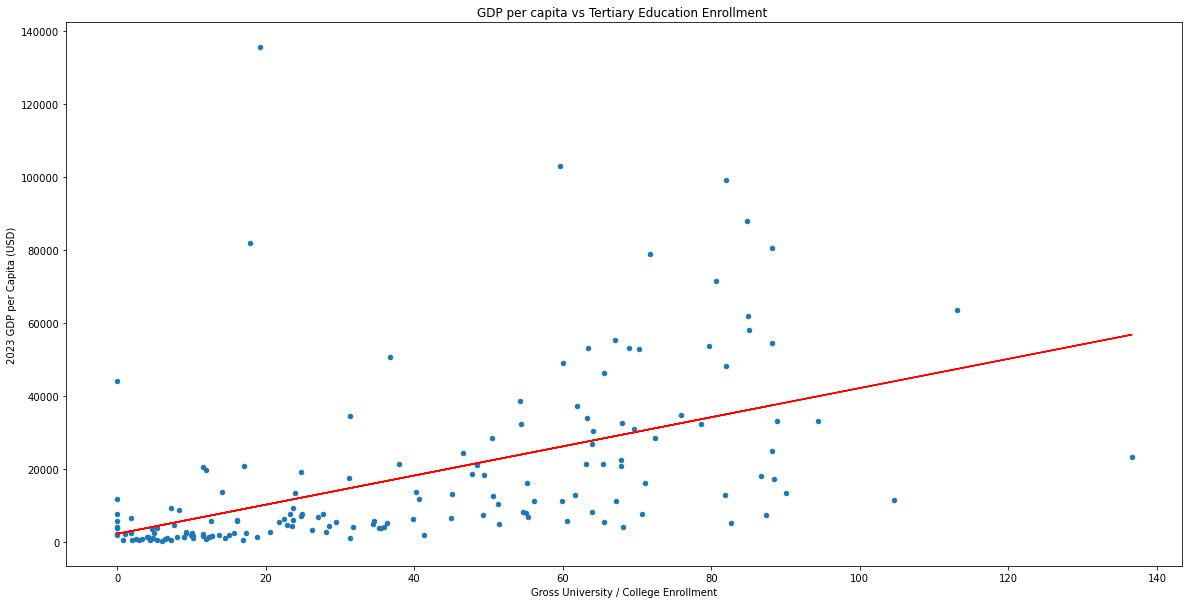

In [5]:
#Scatterplot to look at correlation between GDP per capita and University enrollment
vis2 = combinedData[['Gross_Tertiary_Education_Enrollment', '2023 GDP per Capita (USD)']]

x = vis2['Gross_Tertiary_Education_Enrollment']
y = vis2['2023 GDP per Capita (USD)']
m, b = np.polyfit(x, y, 1)

vis2.plot(kind='scatter', 
          x = 'Gross_Tertiary_Education_Enrollment', 
          y = '2023 GDP per Capita (USD)',
          figsize = (20, 10),
          title = 'GDP per capita vs Tertiary Education Enrollment ',
          xlabel = 'Gross University / College Enrollment',
          ylabel = '2023 GDP per Capita (USD)')

#add linear regression line to scatterplot 
plt.plot(x, m*x+b, color="red")


<IPython.core.display.Javascript object>


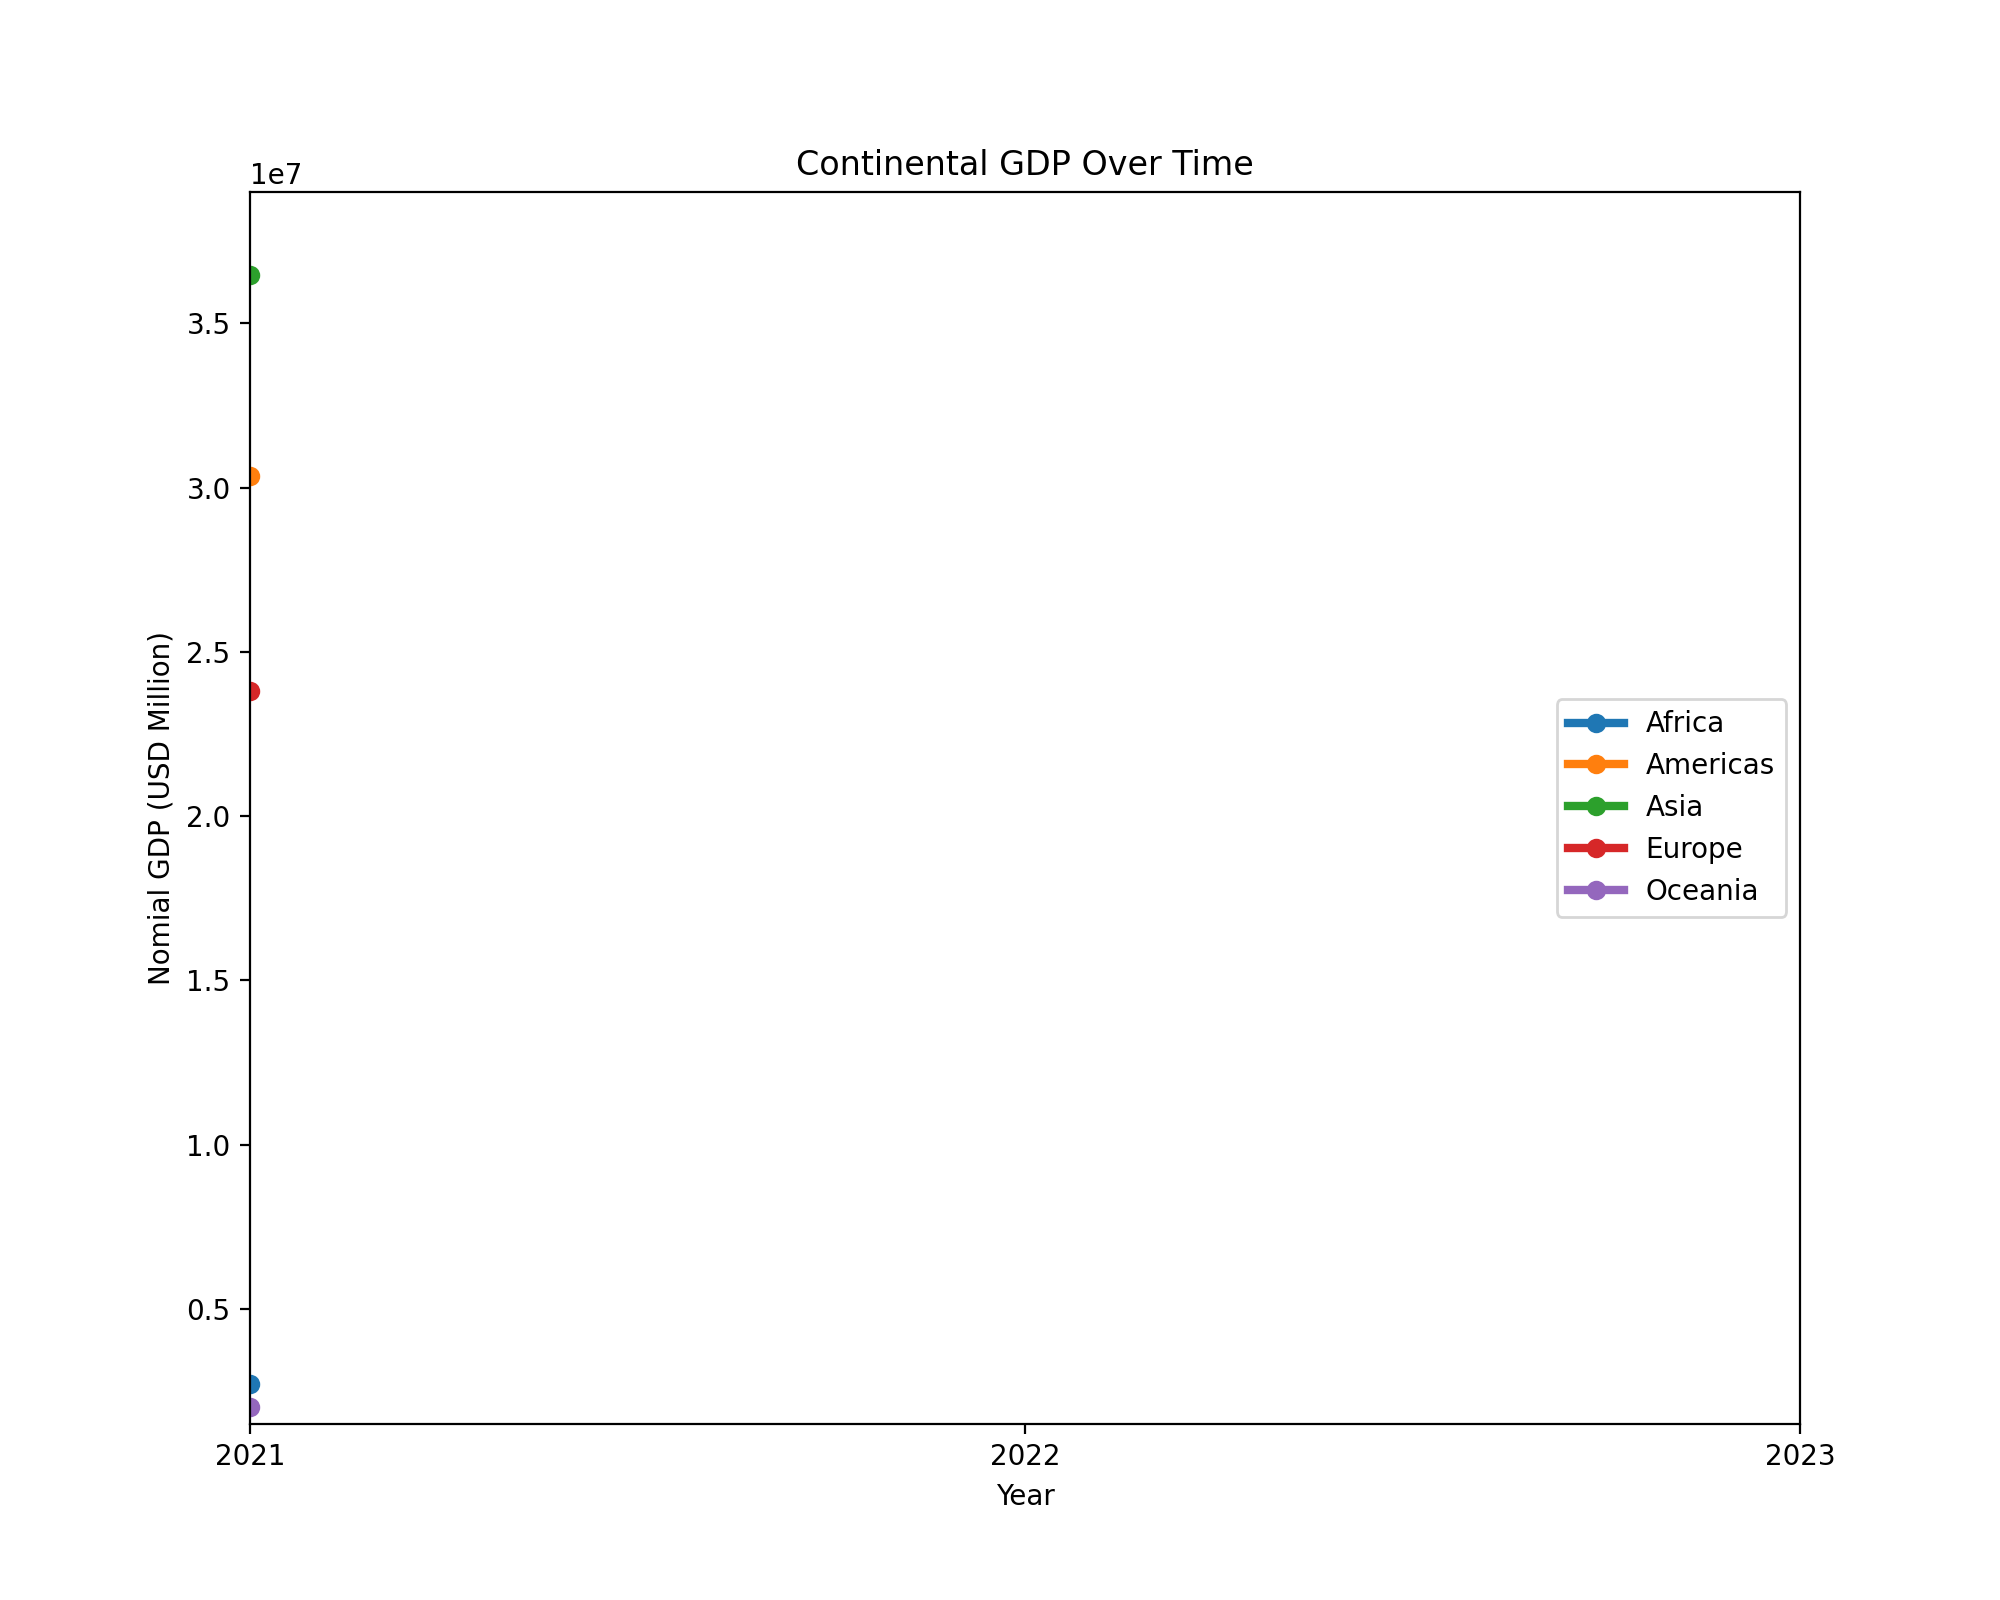

MovieWriter imagemagick unavailable; using Pillow instead.


In [6]:
#Overall growth visualization 2
import matplotlib.animation as animation
%matplotlib notebook

year = [2021, 2022, 2023]

growth2 = continentData.drop(['Percentage growth from 2021 - 2023', 'Per Capita Percentage growth from 2021 - 2023'], axis=1).set_index('Continent')
gdpArray = growth2[['2021 Nominal GDP (USD Million)', '2022 Nominal GDP (USD Million)', '2023 Nominal GDP (USD Million)']]

africaPC = gdpArray[:1].values.flatten().tolist()
americasPC = gdpArray[1:2].values.flatten().tolist()
asiaPC = gdpArray[2:3].values.flatten().tolist()
europePC = gdpArray[3:4].values.flatten().tolist()
oceanaPC = gdpArray[4:5].values.flatten().tolist()

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
def animate(i):
    ax.cla() # clear the previous image
    ax.plot(year[:i], africaPC[:i], label='Africa', linewidth=3, marker='o',) # plot the first line
    ax.plot(year[:i], americasPC[:i], label = 'Americas', linewidth=3, marker='o',) # plot the second line
    ax.plot(year[:i], asiaPC[:i], label = 'Asia', linewidth=3, marker='o',) # plot the second line
    ax.plot(year[:i], europePC[:i], label = 'Europe', linewidth=3, marker='o',) # plot the second line
    ax.plot(year[:i], oceanaPC[:i], label = 'Oceania', linewidth=3, marker='o',) # plot the second line
    
    ax.set_xlim([2021, 2023]) # fix the x axis
    ax.set_ylim([1500000,39000000]) # fix the y axis
    ax.set_title('Continental GDP Over Time')
    ax.set_ylabel('Nomial GDP (USD Million)')
    ax.set_xlabel('Year')
    ax.set_xticks([2021, 2022, 2023])
    ax.legend(loc = 'center right')
    
    
anim = animation.FuncAnimation(fig, animate, frames = 4, interval = 200, blit = False)

from IPython.display import HTML
HTML(anim.to_jshtml())
anim.save("Time.gif", writer='imagemagick',fps=2)
